What is the Grading Scheme for the Mini-Project?

10% for coming up with your own problem definition based on a dataset

10% for data preparation and cleaning to suit the problem of your choice

20% for exploratory data analysis/visualization to gather relevant insights

20% for the use of machine learning techniques to solve specific problem

20% for the presentation of data-driven insights and the recommendations

10% for the quality of your final team presentation and overall impressions

10% for learning something new and doing something beyond this course

---

## **Problem defined based on Marvel Superheroes Dataset:**

**Predict which universe (Marvel/DC) a superhero is in.**

Dataset:         https://www.kaggle.com/datasets/jonathanbesomi/superheroes-nlp-dataset?datasetId=633089&sortBy=voteCount 

Sample:          https://www.kaggle.com/code/raislervoigt/marvel-or-dc-creators#Some-tests 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We shall start off by importing some basic libraries to begin exploratory analysis on our data.

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import train_test_split from sklearn
from sklearn.tree import DecisionTreeClassifier       # Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import plot_tree                    # Plot the trained Decision Tree
from sklearn.metrics import confusion_matrix          # Plot the two-way Confusion Matrix
from sklearn.preprocessing import LabelEncoder        # Encode categorial features into numeric values

# set the default Seaborn style for graphics
sb.set()

Next, we will import the dataset using the read_csv() function from pandas, creating the dataframe: heroesData

In [3]:

# import csv file
heroesData = pd.read_csv("/content/drive/MyDrive/data/superheroes_nlp_dataset.csv")


Let us take a look at a brief overview of what our dataset and its entries look like.

In [4]:
heroesData.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
heroesData.shape

(1450, 81)

In [6]:
heroesData.describe()

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1383.000000,1383.000000,1383.000000,1383.000000,...,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862,0.090383,0.076645,0.075922,0.050615,...,0.266811,0.308026,0.409978,0.433116,0.428778,0.386840,0.511931,0.532899,0.562545,0.528561
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420,0.286834,0.266124,0.264969,0.219289,...,0.442453,0.461844,0.492007,0.495686,0.495080,0.487203,0.500038,0.499097,0.496252,0.499364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,95.000000,65.000000,65.000000,85.000000,100.000000,90.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
heroesData.count()

name                  1448
real_name             1301
full_name              956
overall_score         1450
history_text          1360
                      ... 
has_super_speed       1383
has_durability        1383
has_stamina           1383
has_agility           1383
has_super_strength    1383
Length: 81, dtype: int64

In [8]:
heroesData.dtypes

name                   object
real_name              object
full_name              object
overall_score          object
history_text           object
                       ...   
has_super_speed       float64
has_durability        float64
has_stamina           float64
has_agility           float64
has_super_strength    float64
Length: 81, dtype: object

# **Cleaning dataset**

Our first goal is to determine a Superhero's creator (Marvel/DC) based on only numerical statistics.

We will clean the data by removing unneccesary columns (Eg. has_flight, has_electrokinesis, history_text, etc.), and keep only the relevant data.

In [9]:
# new dataframe with only relevant columns
statsData = pd.DataFrame(heroesData[["overall_score", "intelligence_score", "strength_score", "speed_score", "durability_score", "power_score", "combat_score", "creator"]])
statsData.head()


,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,creator
0,6,85,30,60,60,40,70,Marvel Comics
1,10,100,20,30,50,35,100,DC Comics
2,20,80,100,80,100,100,80,Marvel Comics
3,12,80,50,55,45,100,55,DC Comics
4,5,80,10,25,40,30,50,DC Comics


In [10]:
statsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   overall_score       1450 non-null   object
 1   intelligence_score  1450 non-null   int64 
 2   strength_score      1450 non-null   int64 
 3   speed_score         1450 non-null   int64 
 4   durability_score    1450 non-null   int64 
 5   power_score         1450 non-null   int64 
 6   combat_score        1450 non-null   int64 
 7   creator             1311 non-null   object
dtypes: int64(6), object(2)
memory usage: 90.8+ KB


It is weird that overall_score is showing Dtype of 'object' instead of int64/float. We fix this by converting overall_score using to_numeric and set errors to 'coerce' which means that if there is an error, the invalid entry will be set as NaN.


In [11]:
# change data to numeric form, and data type to Int64
statsData['overall_score'] = pd.to_numeric(statsData['overall_score'], errors='coerce')
statsData['overall_score'] = statsData['overall_score'].astype('Int64')

statsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   overall_score       1325 non-null   Int64 
 1   intelligence_score  1450 non-null   int64 
 2   strength_score      1450 non-null   int64 
 3   speed_score         1450 non-null   int64 
 4   durability_score    1450 non-null   int64 
 5   power_score         1450 non-null   int64 
 6   combat_score        1450 non-null   int64 
 7   creator             1311 non-null   object
dtypes: Int64(1), int64(6), object(1)
memory usage: 92.2+ KB


Now that 'overall_score' has been set to integer, but there is still another problem. There are a total of 1450 entries. However for the column 'overall_score', there are only 1325 non-null values which means there are 125 NaN values that needs to be cleaned. 

Also, there seems to be 139 null values under 'creator' which needs to be cleaned as well.

In [12]:
# remove rows with NaN values
statsData = statsData.dropna()
statsData

,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,creator
0,6,85,30,60,60,40,70,Marvel Comics
1,10,100,20,30,50,35,100,DC Comics
2,20,80,100,80,100,100,80,Marvel Comics
3,12,80,50,55,45,100,55,DC Comics
4,5,80,10,25,40,30,50,DC Comics
...,...,...,...,...,...,...,...,...
1445,10,90,10,25,30,100,55,DC Comics
1446,18,80,100,100,100,100,80,Capcom
1447,20,95,50,100,75,100,80,DC Comics
1448,9,75,10,100,30,100,30,DC Comics


In [13]:
statsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194 entries, 0 to 1449
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   overall_score       1194 non-null   Int64 
 1   intelligence_score  1194 non-null   int64 
 2   strength_score      1194 non-null   int64 
 3   speed_score         1194 non-null   int64 
 4   durability_score    1194 non-null   int64 
 5   power_score         1194 non-null   int64 
 6   combat_score        1194 non-null   int64 
 7   creator             1194 non-null   object
dtypes: Int64(1), int64(6), object(1)
memory usage: 85.1+ KB


After dropping rows with NaN Values, there are now 1194 remaining rows of superheroes with valid numerical values and creator.

Moving on, since we are focusing on Marvel and DC creators only, we need to remove characters from other creators.

In [14]:
# set other creator values to NaN, then remove rows with NaN values
statsData.loc[((statsData['creator'] != "Marvel Comics") & (statsData['creator'] != "DC Comics")),'creator'] = np.NaN
statsData = statsData.dropna()
statsData

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,creator
0,6,85,30,60,60,40,70,Marvel Comics
1,10,100,20,30,50,35,100,DC Comics
2,20,80,100,80,100,100,80,Marvel Comics
3,12,80,50,55,45,100,55,DC Comics
4,5,80,10,25,40,30,50,DC Comics
...,...,...,...,...,...,...,...,...
1442,5,80,10,50,30,45,100,Marvel Comics
1445,10,90,10,25,30,100,55,DC Comics
1447,20,95,50,100,75,100,80,DC Comics
1448,9,75,10,100,30,100,30,DC Comics


After removing 'creators' that are not "Marvel Comics" or "DC Comics", we are left with 975 entires. This is our clean dataset for hero statistics.

---

# **Data Exploration**



In [15]:
# statsData without creator for exploration
statsDataWOC = statsData.drop('creator', axis=1) 

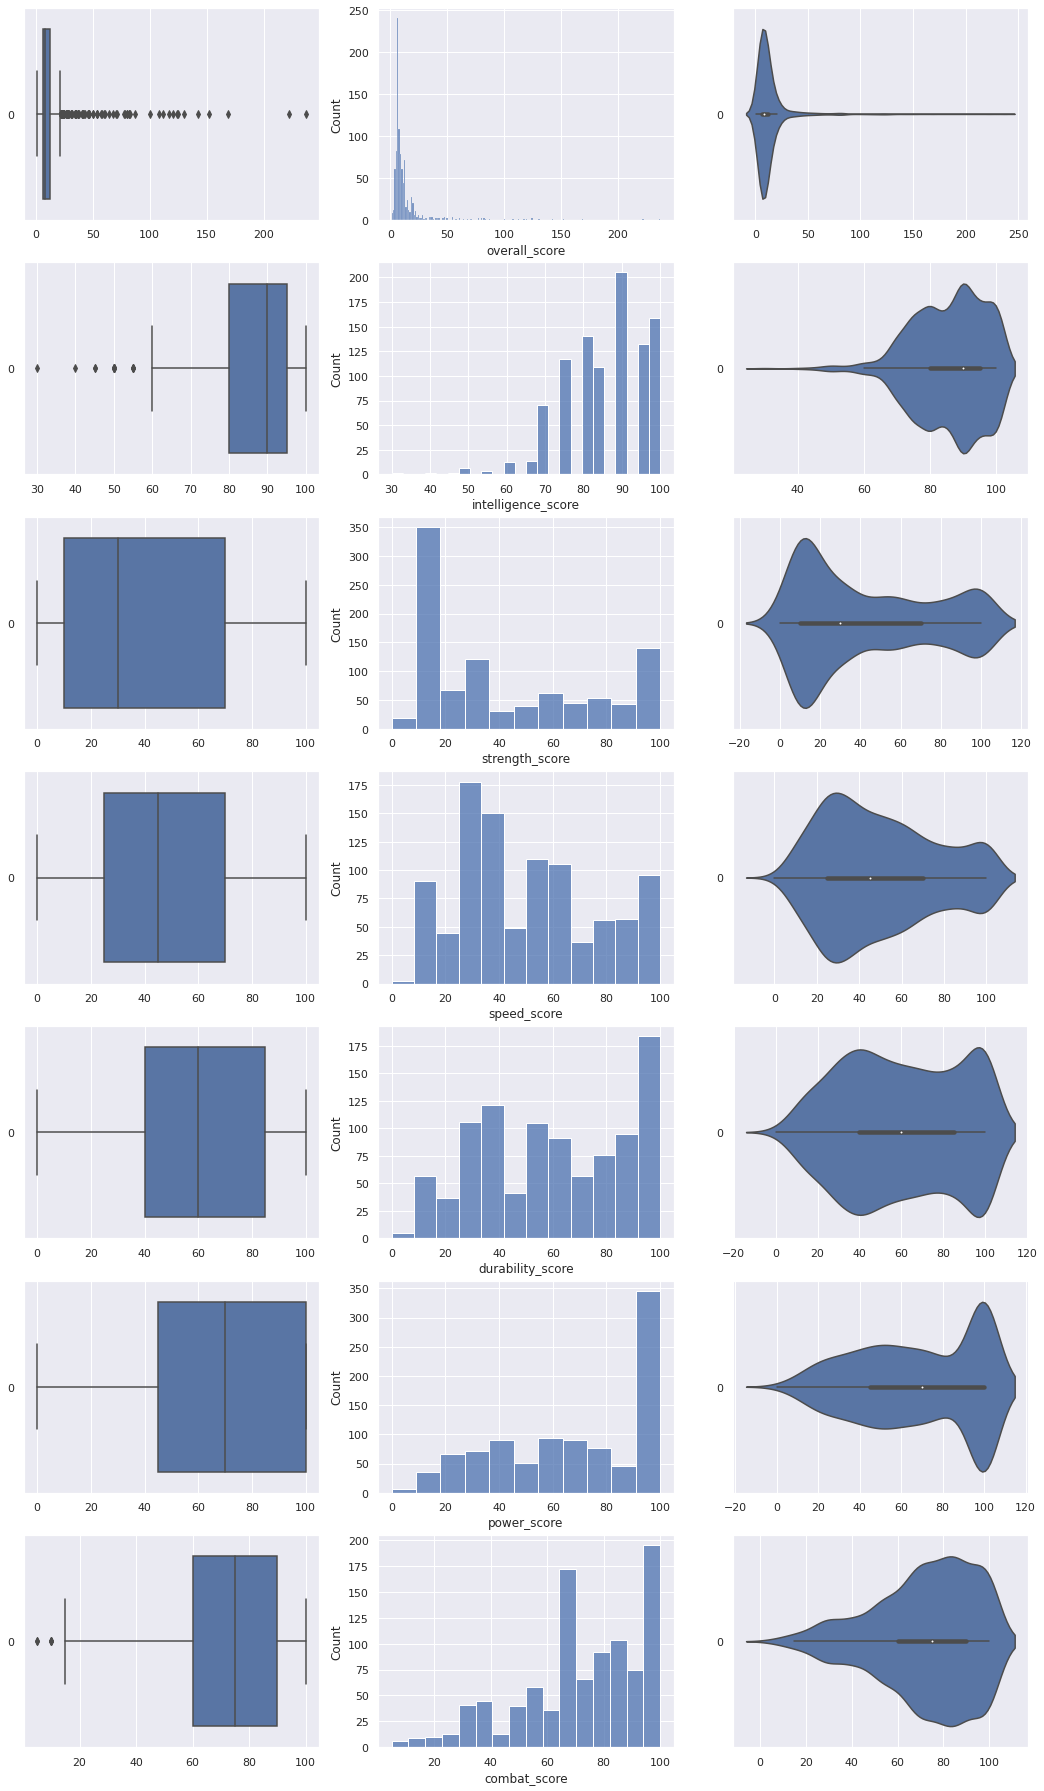

In [16]:
# boxplot, histplot, violinplot for each individual column
f, axes = plt.subplots(7, 3, figsize=(18, 32))

count = 0
for var in statsDataWOC:
    sb.boxplot(data = statsDataWOC[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = statsDataWOC[var], ax = axes[count,1])
    sb.violinplot(data = statsDataWOC[var], orient = "h", ax = axes[count,2])
    count += 1

    

                    overall_score  intelligence_score  strength_score  \
overall_score            1.000000            0.255080        0.434460   
intelligence_score       0.255080            1.000000        0.059490   
strength_score           0.434460            0.059490        1.000000   
speed_score              0.423537            0.122865        0.620062   
durability_score         0.400231            0.053290        0.738799   
power_score              0.368750            0.097858        0.556646   
combat_score             0.118166            0.228708        0.198596   

                    speed_score  durability_score  power_score  combat_score  
overall_score          0.423537          0.400231     0.368750      0.118166  
intelligence_score     0.122865          0.053290     0.097858      0.228708  
strength_score         0.620062          0.738799     0.556646      0.198596  
speed_score            1.000000          0.635030     0.557411      0.304439  
durability_score    

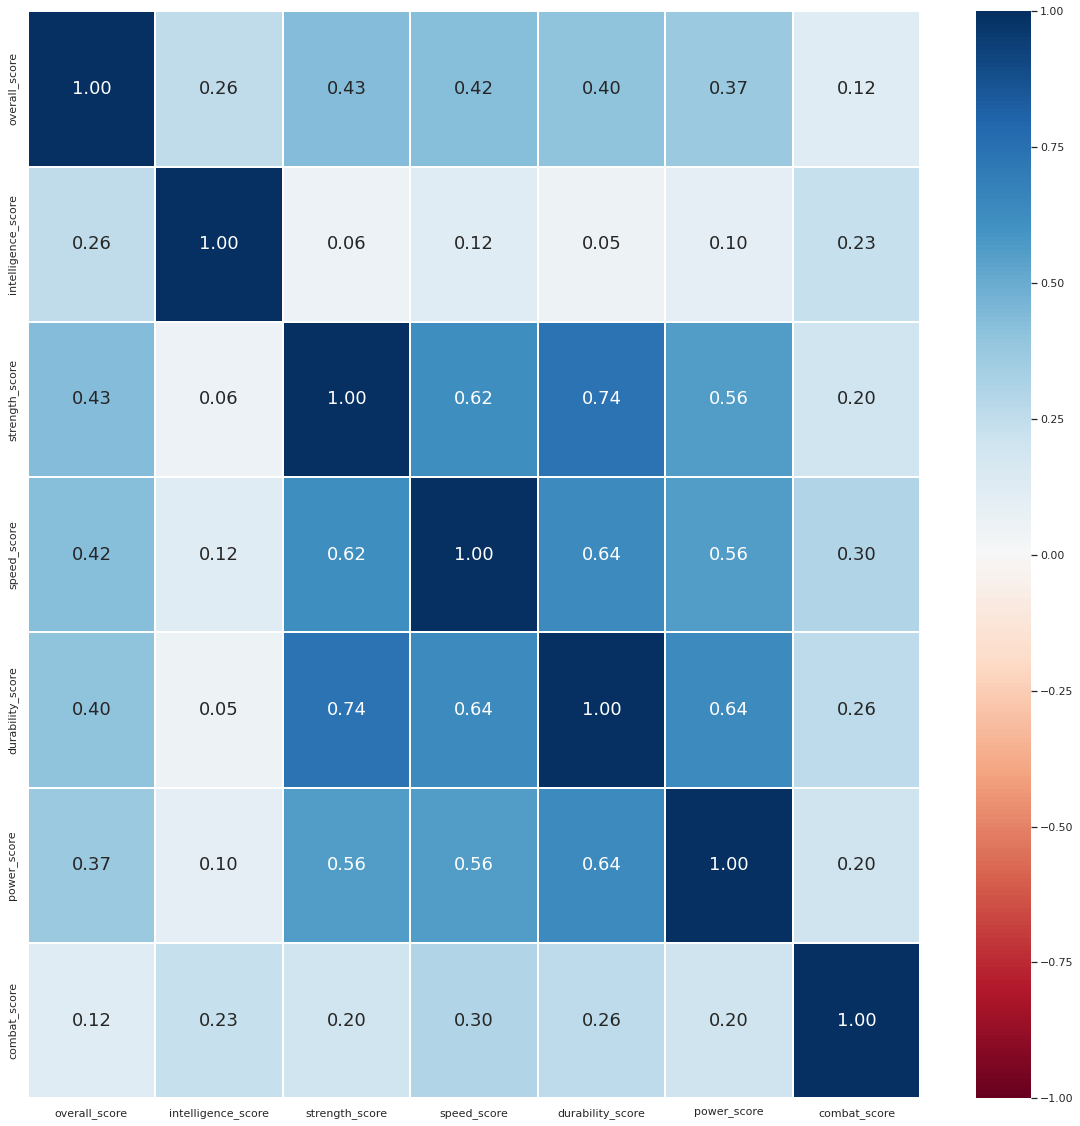

In [17]:

# Correlation Matrix
print(statsDataWOC.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(statsDataWOC.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")



Strong correlation between strength and durabilty (0.74), power and durability (0.64).

# **Decision Tree model**

**Multi-Variate Decision Tree**

In [56]:
# split statsData into independent variables x (statistics) and dependent variable y (creator)
x = pd.DataFrame(statsData.drop('creator', axis=1))
y = pd.DataFrame(statsData['creator'])

In [57]:

# randomly split x and y into train and test dataframes with 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print("Train Set:", y_train.shape, x_train.shape)
print("Test Set :", y_test.shape, x_test.shape)


Train Set: (780, 1) (780, 7)
Test Set : (195, 1) (195, 7)


Basic statistical exploration and visualization on train set.

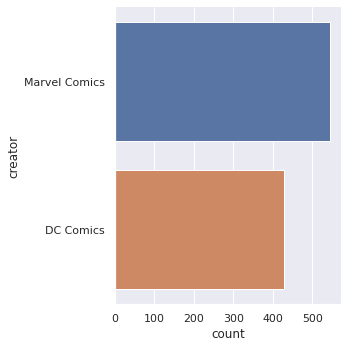

In [58]:
# creator distribution
sb.catplot(y = "creator", data = y, kind = "count")

We observe that there are slightly more Marvel Comics than DC Comics in the Superhero Universe.

In [59]:
# creator distribution in the train set
y_train["creator"].value_counts()

Marvel Comics    440
DC Comics        340
Name: creator, dtype: int64

In [60]:
# statistics distribution in the train set
x_train.describe()

,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,13.397436,85.525641,42.294872,49.762821,60.320513,67.839744,72.948718
std,20.063148,11.189492,33.463758,26.498265,28.104880,29.456675,21.490301
min,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,6.000000,80.000000,10.000000,25.000000,40.000000,45.000000,60.000000
50%,8.000000,90.000000,30.000000,45.000000,60.000000,70.000000,75.000000
75%,12.000000,95.000000,71.250000,70.000000,85.000000,100.000000,90.000000
max,237.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6858974358974359
Train set: True Positive Rate 	: 0.740909090909091
Train set: False Positive Rate 	: 0.38529411764705884

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5230769230769231
Test set: True Positive Rate 	: 0.6037735849056604
Test set: False Positive Rate 	: 0.5730337078651685



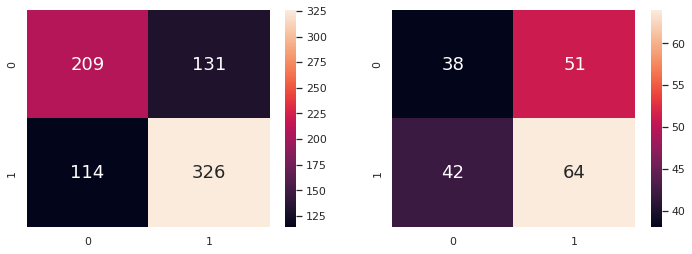

In [61]:
# Decision Tree using train data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict creator corresponding to predictors (train and test)
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Calculation of TPR and FPR
TNtrain, FPtrain, FNtrain, TPtrain = confusion_matrix(y_train, y_train_pred).ravel()
TNtest, FPtest, FNtest, TPtest = confusion_matrix(y_test, y_test_pred).ravel()

TPRtrain = TPtrain/(TPtrain+FNtrain)
FPRtrain = FPtrain/(FPtrain+TNtrain)

TPRtest = TPtest/(TPtest+FNtest)
FPRtest = FPtest/(FPtest+TNtest)

# Check the Goodness of Fit (on train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print("Train set: True Positive Rate \t:", TPRtrain)
print("Train set: False Positive Rate \t:", FPRtrain)
print()

# Check the Goodness of Fit (on test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print("Test set: True Positive Rate \t:", TPRtest)
print("Test set: False Positive Rate \t:", FPRtest)
print()

# Plot the Confusion Matrix for train and test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Decent Accuracy averaging around 60% with relatively high false positive rate of 60% average.

[Text(0.5, 0.9, 'combat_score <= 72.5\ngini = 0.492\nsamples = 780\nvalue = [340, 440]\nclass = DC Comics'),
 Text(0.25, 0.7, 'overall_score <= 8.5\ngini = 0.447\nsamples = 347\nvalue = [117, 230]\nclass = DC Comics'),
 Text(0.125, 0.5, 'combat_score <= 47.5\ngini = 0.397\nsamples = 220\nvalue = [60, 160]\nclass = DC Comics'),
 Text(0.0625, 0.3, 'power_score <= 37.5\ngini = 0.482\nsamples = 74\nvalue = [30, 44]\nclass = DC Comics'),
 Text(0.03125, 0.1, 'gini = 0.383\nsamples = 31\nvalue = [8, 23]\nclass = DC Comics'),
 Text(0.09375, 0.1, 'gini = 0.5\nsamples = 43\nvalue = [22, 21]\nclass = Marvel Comics'),
 Text(0.1875, 0.3, 'durability_score <= 22.5\ngini = 0.327\nsamples = 146\nvalue = [30, 116]\nclass = DC Comics'),
 Text(0.15625, 0.1, 'gini = 0.496\nsamples = 22\nvalue = [12, 10]\nclass = Marvel Comics'),
 Text(0.21875, 0.1, 'gini = 0.248\nsamples = 124\nvalue = [18, 106]\nclass = DC Comics'),
 Text(0.375, 0.5, 'strength_score <= 12.5\ngini = 0.495\nsamples = 127\nvalue = [57, 70]\

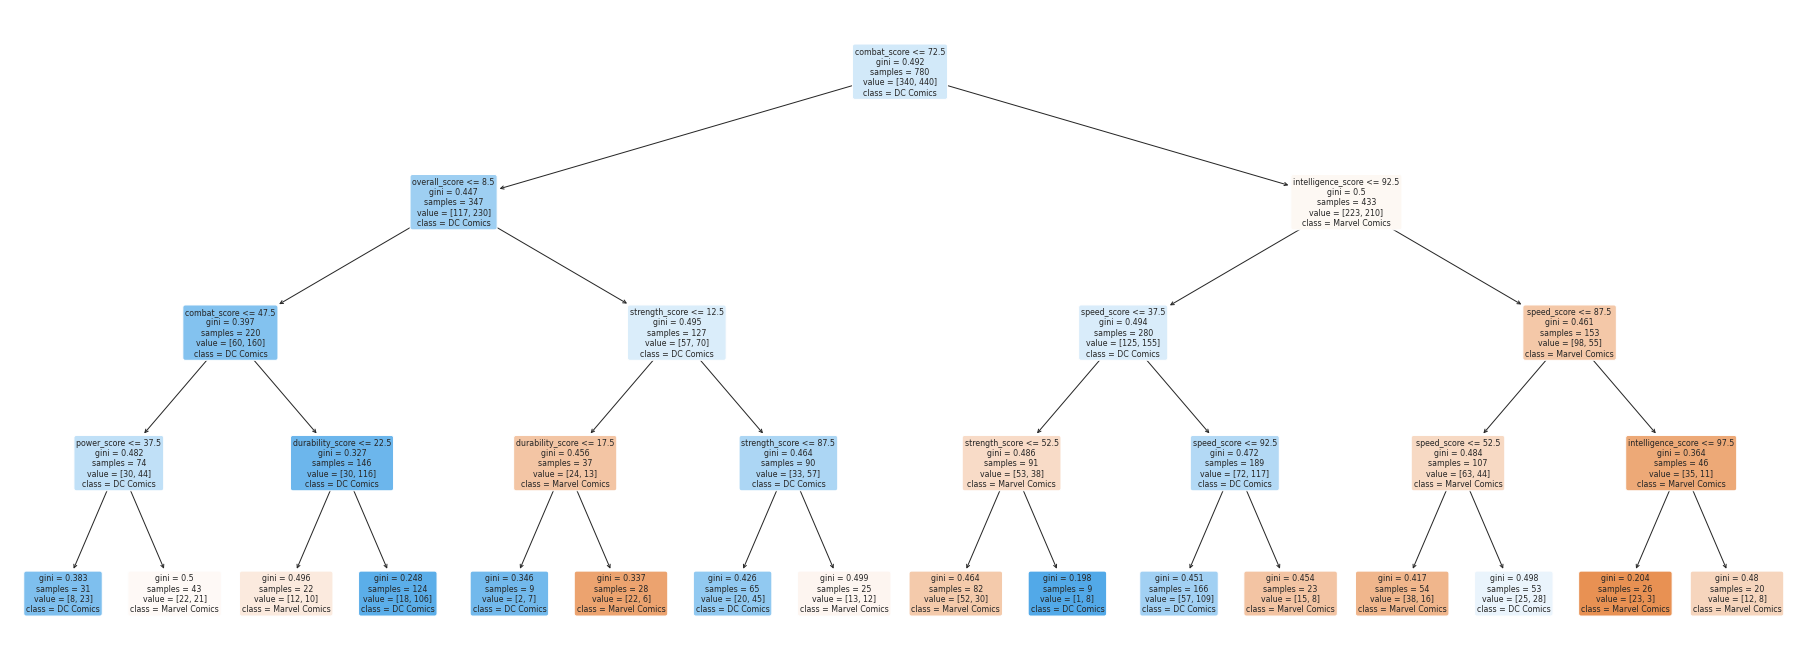

In [62]:
# display Decision Tree

f = plt.figure(figsize=(32,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["Marvel Comics","DC Comics"])

Let us attempt to predict the creators of certain characters (Deadpool, Harley Quinn, Hulk).
First, we need to isolate the characters that we want to test our prediction on.

In [63]:
# test prediction on specific characters: Deadpool, Harley Quinn, Hulk

heroes_pred = heroesData[heroesData["name"].isin(["Deadpool", "Harley Quinn", "Hulk"])]
heroes_pred

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
370,Deadpool,Wade Wilson,Wade Winston Wilson,12,Not too much is known about Deadpool's chil...,Deadpool possesses a superhuman healing fact...,80,20,50,100,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
566,Harley Quinn,Harleen Quinzel,Harleen Francis Quinzel,8,"Described as having a genius-level IQ, Harlee...",Immunizes her to various assorted toxins and...,95,10,35,65,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
616,Hulk,Bruce Banner,Robert Bruce Banner,34,Robert Bruce Banner was the son of an alcoho...,The Hulk is one of the most powerful beings in...,60,100,85,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [64]:
# keep only relevant columns, name and creator
heroes_pred_creator = pd.DataFrame(heroes_pred[['name', 'creator']])
heroes_pred_creator

,name,creator
370,Deadpool,Marvel Comics
566,Harley Quinn,DC Comics
616,Hulk,Marvel Comics


Observe that Deadpool and Hulk are created by Marvel Comics, and Harley Quinn is created by DC Comics.

In [65]:
# Extract Predictors for Prediction
predictors = ["overall_score", "intelligence_score", "strength_score", "speed_score", "durability_score",	"power_score", "combat_score"]
x_pred = pd.DataFrame(heroes_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(x_pred)
y_pred

array(['Marvel Comics', 'DC Comics', 'Marvel Comics'], dtype=object)

In [66]:
# Compare actual creators with predictions
# creator_pred is the predicted creator by the dectree model
y_pred = pd.DataFrame(y_pred, columns = ["creator_pred"], index = heroes_pred.index)
heroes_acc = pd.concat([heroes_pred[["name", "creator"]], y_pred], axis = 1)

heroes_acc

,name,creator,creator_pred
370,Deadpool,Marvel Comics,Marvel Comics
566,Harley Quinn,DC Comics,DC Comics
616,Hulk,Marvel Comics,Marvel Comics


In [67]:
# Predict Probabilities corresponding to Predictors
y_prob = dectree.predict_proba(x_pred)
y_prob

array([[0.34337349, 0.65662651],
       [0.7037037 , 0.2962963 ],
       [0.34337349, 0.65662651]])

In [68]:
# Summarize the Probabilities with the Predictions
# marvel_prob is probability that character is created by Marvel Comics
y_prob = pd.DataFrame(list(y_prob[:,1]), columns = ["marvel_prob"], index = heroes_pred.index)
heroes_pred_prob = pd.concat([heroes_acc, y_prob], axis = 1)

heroes_pred_prob

,name,creator,creator_pred,marvel_prob
370,Deadpool,Marvel Comics,Marvel Comics,0.656627
566,Harley Quinn,DC Comics,DC Comics,0.296296
616,Hulk,Marvel Comics,Marvel Comics,0.656627


Using Classification Tree, we have successfully predicted the creators for 3 superheroes namely, Deadpool, Harley Quinn and Hulk correctly. Although it made the correct predictions, the probabilty is quite low on average. 

With that in mind, we would like to explore predicting a superhero's creator using Natural Language Processing, based on each hero's own description/history_text.

---

# **Natural Language Processing**

Firstly, let us create another dataframe from the original dataframe with only the history_text and creator columns.

In [69]:
# new dataframe with only relevant columns
historyData = heroesData[["history_text", "creator"]]
historyData

,history_text,creator
0,"Delroy Garrett, Jr. grew up to become a track ...",Marvel Comics
1,He was one of the many prisoners of Indian Hil...,DC Comics
2,"Richard ""Rick"" Jones was orphaned at a young ...",Marvel Comics
3,Aa is one of the more passive members of the P...,DC Comics
4,Aaron Cash is the head of security at Arkham A...,DC Comics
...,...,...
1445,Zatanna is the daughter of adventurer John Zat...,DC Comics
1446,Zero was created by the late Dr. Albert Wily ...,Capcom
1447,"Hunter Zolomon is better known as Zoom, a spee...",DC Comics
1448,Hunter Zolomon had a troubled relationship wi...,DC Comics


In [70]:
historyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   history_text  1360 non-null   object
 1   creator       1311 non-null   object
dtypes: object(2)
memory usage: 22.8+ KB


As before, we need to clean the dataset by removing NaN values, as well as any characters not created by Marvel Comics or DC Comics.

In [71]:
# set non-Marvel/DC creators to NaN
historyData.loc[((historyData['creator'] != "Marvel Comics") & (historyData['creator'] != "DC Comics")),'creator'] = np.NaN

# remove all NaN values
historyData = historyData.dropna()
historyData

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,history_text,creator
0,"Delroy Garrett, Jr. grew up to become a track ...",Marvel Comics
1,He was one of the many prisoners of Indian Hil...,DC Comics
2,"Richard ""Rick"" Jones was orphaned at a young ...",Marvel Comics
3,Aa is one of the more passive members of the P...,DC Comics
4,Aaron Cash is the head of security at Arkham A...,DC Comics
...,...,...
1443,Little is known about the early life of the ad...,Marvel Comics
1445,Zatanna is the daughter of adventurer John Zat...,DC Comics
1447,"Hunter Zolomon is better known as Zoom, a spee...",DC Comics
1448,Hunter Zolomon had a troubled relationship wi...,DC Comics


After dropping rows with NaN Values, there are now 997 remaining rows of superheroes with valid history_text and creator.

Next, we will create a word cloud of all the words present in history_text for Marvel characters and DC characters separately. This will help us to see which words are more commonly used by either creator.

In [72]:
# concatenate all words in history_text into Cloud_Marvel and Cloud_DC
Cloud_Marvel = historyData['history_text'].loc[(historyData.creator == 'Marvel Comics')]
Cloud_Marvel = Cloud_Marvel.sum()
Cloud_DC = historyData['history_text'].loc[(historyData.creator == 'DC Comics')]
Cloud_DC = Cloud_DC.sum()

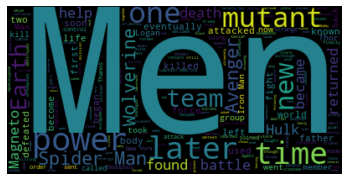

In [73]:
from wordcloud import WordCloud

# display Marvel WordCloud
wordcloud = WordCloud(max_font_size=300,background_color="black").generate(Cloud_Marvel)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [74]:
# get word count from cloud
wordcount = wordcloud.process_text(Cloud_Marvel)

# view 10 words with highest count
top10 = sorted(wordcount, key=wordcount.get, reverse=True)[:10]

for item in wordcount:
  if item in top10:
    print(item, wordcount[item])

one 784
time 871
later 869
Earth 601
new 713
power 996
team 712
mutant 752
Men 1066
Spider Man 595


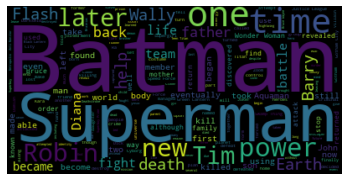

In [75]:
# display DC WordCloud
wordcloud = WordCloud(max_font_size=300,background_color="black").generate(Cloud_DC)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [76]:
# get word count from cloud
wordcount = wordcloud.process_text(Cloud_DC)

# view 10 words with highest count
top10 = sorted(wordcount, key=wordcount.get, reverse=True)[:10]

# top10

# for item in wordcount:
#   if item in top10:
#     print(item, wordcount[item])

It is easy to see that words like "mutant" and "avenger" are only widely used in the Marvel word cloud, while "Batman" and "Superman" are widely used in the DC word cloud. "Men" is also much more widely used in Marvel history_text, although it is likely that it is also used by DC since it is a neutral word that does not have much relation to the Marvel universe.

With this in mind, given any history_text data, we can analyse the individual words to see if there is any indication of its likely corresponding creator. To do this, we will need to split the dataset into two again, to train and test.

In [77]:
# randomly split historyData into train and test dataframes with 80:20 ratio
train, test = train_test_split(historyData, test_size = 0.20)

print("Train Set:", train.shape)
print("Test Set :", test.shape)

Train Set: (797, 2)
Test Set : (200, 2)


Before we carry on, we will need to declare a function for use later. This will remove any non-text ASCII characters and punctuation and lower the text so that we can analyse the text more accurately and smoothly.

In [78]:
import re

def clean_text(text):
    
    # Applies some pre-processing on the given text:
    # - Removing non-text characters and punctuation
    # - Lowering text
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)   
    text = re.sub(r"\'", "", text)   
    text = re.sub(r"\"", "", text)    
                  
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map) 
                           
    # convert text to lowercase
    text = text.strip().lower()

    return text

Next, we will transform each history_text into vectors of word counts, using the function defined above to clean the text. We will also ignore any stop words, which are the most common words like "the" and "a", because they will not improve our analysis.

We will then fit our training data with a LinearSVC model, and use that to predict the creators.

In [79]:

from sklearn.feature_extraction.text import CountVectorizer

# Transform each text into a vector of word counts
# Ignores stop words and uses above function to clean the text
vectorizer = CountVectorizer(stop_words="english", preprocessor=clean_text)

# transform vectors into matrices of the text vocabulary
training_features = vectorizer.fit_transform(train["history_text"])    
test_features = vectorizer.transform(test["history_text"])


In [80]:

from sklearn.svm import LinearSVC

# Training using LinearSVC model
model = LinearSVC()
model.fit(training_features, train["creator"])

# Predict with model on test dataset
y_pred = model.predict(test_features)


In [81]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score comparing actual creator and predicted creator
acc = accuracy_score(test["creator"], y_pred)

print("Accuracy of creator prediction: {:.2f}".format(acc*100))

Accuracy of creator prediction: 91.00


In [82]:
# Calculation of TPR and FPR
TNtest, FPtest, FNtest, TPtest = confusion_matrix(test["creator"], y_pred).ravel()

TPRtest = TPtest/(TPtest+FNtest)
FPRtest = FPtest/(FPtest+TNtest)

print("Test set: True Positive Rate \t:", TPRtest)
print("Test set: False Positive Rate \t:", FPRtest)

Test set: True Positive Rate 	: 0.897196261682243
Test set: False Positive Rate 	: 0.07526881720430108


As we can see, this model predicts the correct creator a high percentage of the time. This is a big improvement from the initial predictions we have made with the numerical data.

Again, to compare with the initial prediction relying on numerical data, let us attempt to predict the creators of the same characters (Deadpool, Harley Quinn, Hulk). We will use the heroes_pred dataframe from before for this.

Recall that Deadpool and Hulk are created by Marvel Comics, and Harley Quinn is created by DC Comics.


In [83]:
# test on same characters as before: Deadpool, Harley Quinn, Hulk
test_features = vectorizer.transform(heroes_pred["history_text"])
y_pred = model.predict(test_features)

y_pred

array(['Marvel Comics', 'DC Comics', 'Marvel Comics'], dtype=object)

In [84]:
# Compare actual creators with predictions
y_pred = pd.DataFrame(y_pred, columns = ["Predcreator"], index = heroes_pred.index)
heroes_acc = pd.concat([heroes_pred[["name", "creator"]], y_pred], axis = 1)

heroes_acc

,name,creator,Predcreator
370,Deadpool,Marvel Comics,Marvel Comics
566,Harley Quinn,DC Comics,DC Comics
616,Hulk,Marvel Comics,Marvel Comics


In [85]:
from sklearn.calibration import CalibratedClassifierCV

# Predict Probabilities corresponding to Predictors
clf = CalibratedClassifierCV(model) 
clf.fit(training_features, train["creator"])
y_prob = clf.predict_proba(test_features)

y_prob

array([[2.72819800e-05, 9.99972718e-01],
       [6.03086170e-01, 3.96913830e-01],
       [4.90891519e-03, 9.95091085e-01]])

In [86]:
# Summarize the Probabilities with the Predictions
# marvel_prob is probability that character is created by Marvel Comics
y_prob = pd.DataFrame(list(y_prob[:,1]), columns = ["marvel_prob"], index = heroes_pred.index)
heroes_pred_prob = pd.concat([heroes_acc, y_prob], axis = 1)

heroes_pred_prob

,name,creator,Predcreator,marvel_prob
370,Deadpool,Marvel Comics,Marvel Comics,0.999973
566,Harley Quinn,DC Comics,DC Comics,0.396914
616,Hulk,Marvel Comics,Marvel Comics,0.995091


Using Natural Language Processing, we have again successfully predicted the creators for 3 superheroes namely, Deadpool, Harley Quinn and Hulk correctly. This time, the probabilities of success are much higher compared to the analysis based on their statistics. Since the classification accuracy is higher, we consider this an improvement, a valuable and meaningful addition to our initial analysis.

---

# **Point Estimation**

These values of classification accuracy and probabilities are based on the train and test datasets, chosen at random. This means that with every new iteration of this analysis, the values obtained may differ, and could possibly be erroneous even.

This next segment will iterate through both parts of the analysis with the train and test sets split repeatedly at random 30 times, such that we can apply Central Limit Theorem to assume a normal distribution of classification accuracy values. This allows us to determine the level of significance of our observations, and obtain a confidence interval for both methods.

The null hypothesis is that the mean classification accuracy is equal to 0.5, meaning that the predictions are accurate around 50% of the time. The alternative hypothesis is that the mean classification accuracy is greater than 0.5. 



In [49]:
from statistics import mean, stdev
from scipy import stats

# split statsData into independent variables x (statistics) and dependent variable y (creator)
x = pd.DataFrame(statsData.drop('creator', axis=1))
y = pd.DataFrame(statsData['creator'])

# store classification accuracy values in a list
statsAccList = []

# repeat 30 times, append values to list
for i in range(30):

  # randomly split x and y into train and test dataframes with 80:20 ratio
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

  # Decision Tree using train data
  dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
  dectree.fit(x_train, y_train)                    # train the decision tree model

  # Predict creator corresponding to predictors (only test)
  y_test_pred = dectree.predict(x_test)

  # append classificatiton accuracy value to list
  statsAccList.append(dectree.score(x_test, y_test))

mean(statsAccList)

0.5964102564102564

In [50]:
# store classification accuracy values in a list
nlpAccList = []

# repeat 30 times, append values to list
for i in range(30):

  # randomly split historyData into train and test dataframes with 80:20 ratio
  train, test = train_test_split(historyData, test_size = 0.20)

  # Transform each text into a vector of word counts
  # Ignores stop words and uses above function to clean the text
  vectorizer = CountVectorizer(stop_words="english", preprocessor=clean_text)

  # transform vectors into matrices of the text vocabulary
  training_features = vectorizer.fit_transform(train["history_text"])    
  test_features = vectorizer.transform(test["history_text"])

  # Training using LinearSVC model
  model = LinearSVC()
  model.fit(training_features, train["creator"])

  # Predict with model on test dataset
  y_pred = model.predict(test_features)

  # append classificatiton accuracy value to list
  nlpAccList.append(accuracy_score(test["creator"], y_pred))

mean(nlpAccList)

0.8748333333333334

In [51]:
# from math import sqrt

# # mathematical calculations match the function 
# zscoreStats = (mean(statsAccList) - 0.50) / (stdev(statsAccList) / sqrt(30))
# zscoreNlp = (mean(nlpAccList) - 0.50) / (stdev(nlpAccList) / sqrt(30))

# print("z-score, p-value for stats method:\t", ztest(statsAccList, value = 0.5))
# print("z-score, p-value for nlp method:\t", ztest(nlpAccList, value = 0.5))

In [52]:
from statsmodels.stats.weightstats import ztest, zconfint

# use ztest function to obtain z-score and p-value 
# returns p-value for 2-tailed test, need to divide by 2 for this 1-tailed test
print("z-score, p-value for decision tree method:\t", ztest(statsAccList, value = 0.5))
print("z-score, p-value for nlp method:\t\t", ztest(nlpAccList, value = 0.5))

z-score, p-value for decision tree method:	 (12.460973769847802, 1.2187332270854363e-35)
z-score, p-value for nlp method:		 (87.20343609000074, 0.0)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [53]:
# use function to determine 95% confidence interval
print("confidence interval for decision tree method:\t", zconfint(statsAccList, alpha = 0.05))
print("confidence interval for nlp method:\t\t", zconfint(nlpAccList, alpha = 0.05))

confidence interval for decision tree method:	 (0.5812460618782362, 0.6115744509422769)
confidence interval for nlp method:		 (0.8664086672137529, 0.8832579994529138)


As we can see, the calculated z-scores are incredibly high and the p-values are incredibly low. This means that the probability that our model is effective is very significant, even to a 99% significance level, since the p-values (divided by 2) are much lower than 0.01. Thus, we reject the null hypothesis.

On that note, while the classification accuracy may vary slightly depending on the random split of the train and test sets, we have determined the 95% confidence interval for the classification accuracy with regards to both models. This means that 95% of the time, the classification accuracy should fall in this range of values.

---

# **Optimal Depth of Decision Tree**

To improve on our analysis further, we wanted to find out if the max depth chosen for the decision tree was optimal. With too few levels, the decision tree will be underfitted, and the predictions will have a higher gini coefficient and will not be as strong. On the other hand, with too many levels the decision tree will become overfitted, meaning that it fits the training data well, but fails to generalise for unseen test data.

Below is the same code for the average classification accuracy, repeated iteratively with increasing depth from 1 to 20. The means are stored in a dictionary, later used to plot a linegraph for easy visualisation. The optimal depth is the one with highest average classification accuracy.

In [89]:
# split statsData into independent variables x (statistics) and dependent variable y (creator)
x = pd.DataFrame(statsData.drop('creator', axis=1))
y = pd.DataFrame(statsData['creator'])

# store average values in a dictionary for graphing
depths = {}
for depth in range(1, 21):

  # store classification accuracy values in a list
  statsAccList = []

  # repeat 30 times, append values to list
  for i in range(30):

    # randomly split x and y into train and test dataframes with 80:20 ratio
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

    # Decision Tree using train data
    dectree = DecisionTreeClassifier(max_depth = depth)  # create the decision tree object
    dectree.fit(x_train, y_train)                    # train the decision tree model

    # Predict creator corresponding to predictors (only test)
    y_test_pred = dectree.predict(x_test)

    # append classificatiton accuracy value to list
    statsAccList.append(dectree.score(x_test, y_test))

  # depthList[depth] = mean(statsAccList)
  depths[depth] = mean(statsAccList)

depths

{1: 0.5567521367521368,
 2: 0.5683760683760684,
 3: 0.583076923076923,
 4: 0.5847863247863248,
 5: 0.6003418803418803,
 6: 0.5984615384615385,
 7: 0.592991452991453,
 8: 0.5834188034188035,
 9: 0.5950427350427351,
 10: 0.5994871794871794,
 11: 0.5972649572649573,
 12: 0.587008547008547,
 13: 0.5794871794871795,
 14: 0.5866666666666667,
 15: 0.5882051282051282,
 16: 0.5878632478632478,
 17: 0.5825641025641025,
 18: 0.5868376068376069,
 19: 0.5808547008547008,
 20: 0.58991452991453}

[Text(0, 0.5, 'mean score'), Text(0.5, 0, 'depth')]

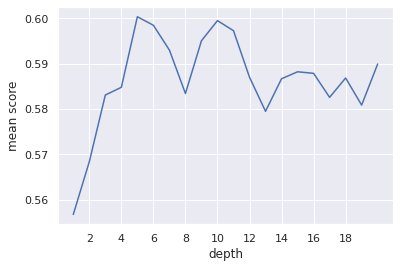

In [90]:
plt.xticks([i for i in range(0, 20, 2)])
plt.yticks([i/100 for i in range(50, 65)])

ax = sb.lineplot(data = depths)
ax.set(xlabel='depth', ylabel='mean score')

From the graph, we can infer that the optimal depth of the decision tree for this dataset is around 5.